In [196]:
import numpy as np
from scipy.fft import fft, rfft, fftfreq, fftshift
from scipy.signal import correlate, welch
from scipy.signal.windows import hamming, hann
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('./nikhils_plot_style.mplstyle')

# Simulated data

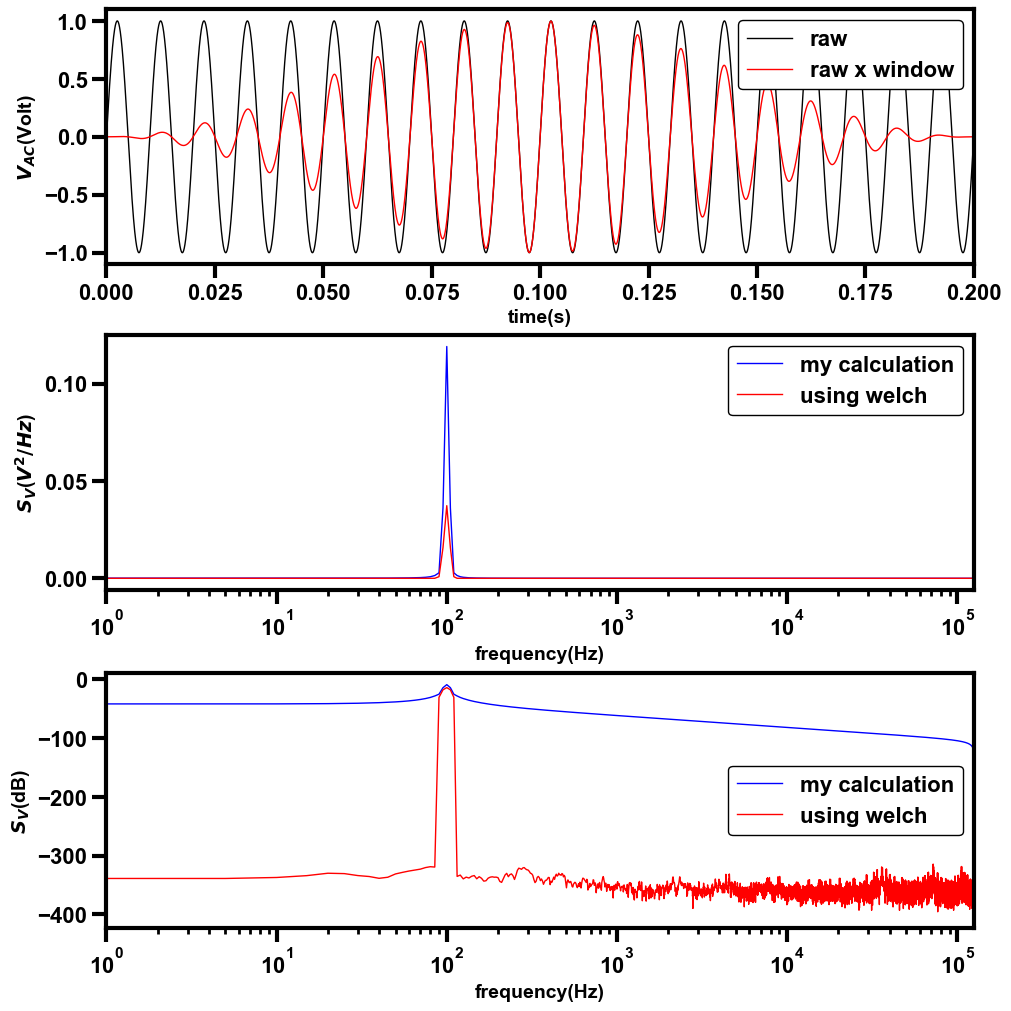

In [197]:
sampling_rate = 0.25e6 # Hz
sampling_time = 0.2 # seconds
N = int(sampling_rate*sampling_time) # number of samples
time = np.arange(0,sampling_time,1/sampling_rate)

V = np.sin(2*np.pi*100*time) # sine signal with frequency 100Hz

V = V - np.mean(V)

Vraw = V
V = V*hann(N+1) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="my calculation")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="using welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="my calculation")
ax3.plot(fq,10*np.log10(SS),'r-', label="using welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Trying with actual data from scope

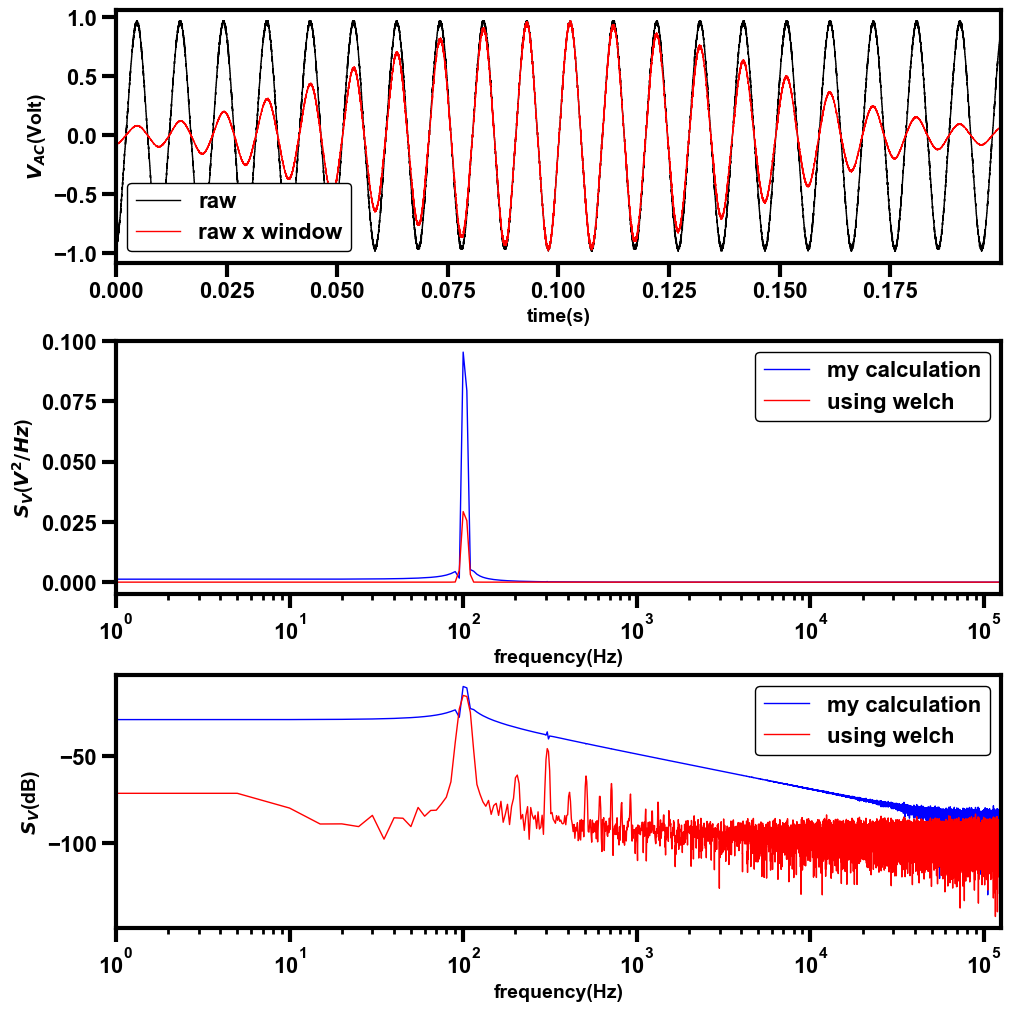

In [198]:
fp="./data/scope_1.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="my calculation")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="using welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="my calculation")
ax3.plot(fq,10*np.log10(SS),'r-', label="using welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# 10 kOhm resistor data

1.5 Volt battery with 10 M Ohm resistor in series gives 1.5 uA of current.

This current flows through a 10 kOhm resistor to give a voltage drop of V = 1.5 uA x 10 kOhm = 1.5 mV

The thermal noise should be equal to $S_V(f)$ = 4kTR = 104 meV x 10 kOhm = 1.664e-16 V^2/Hz


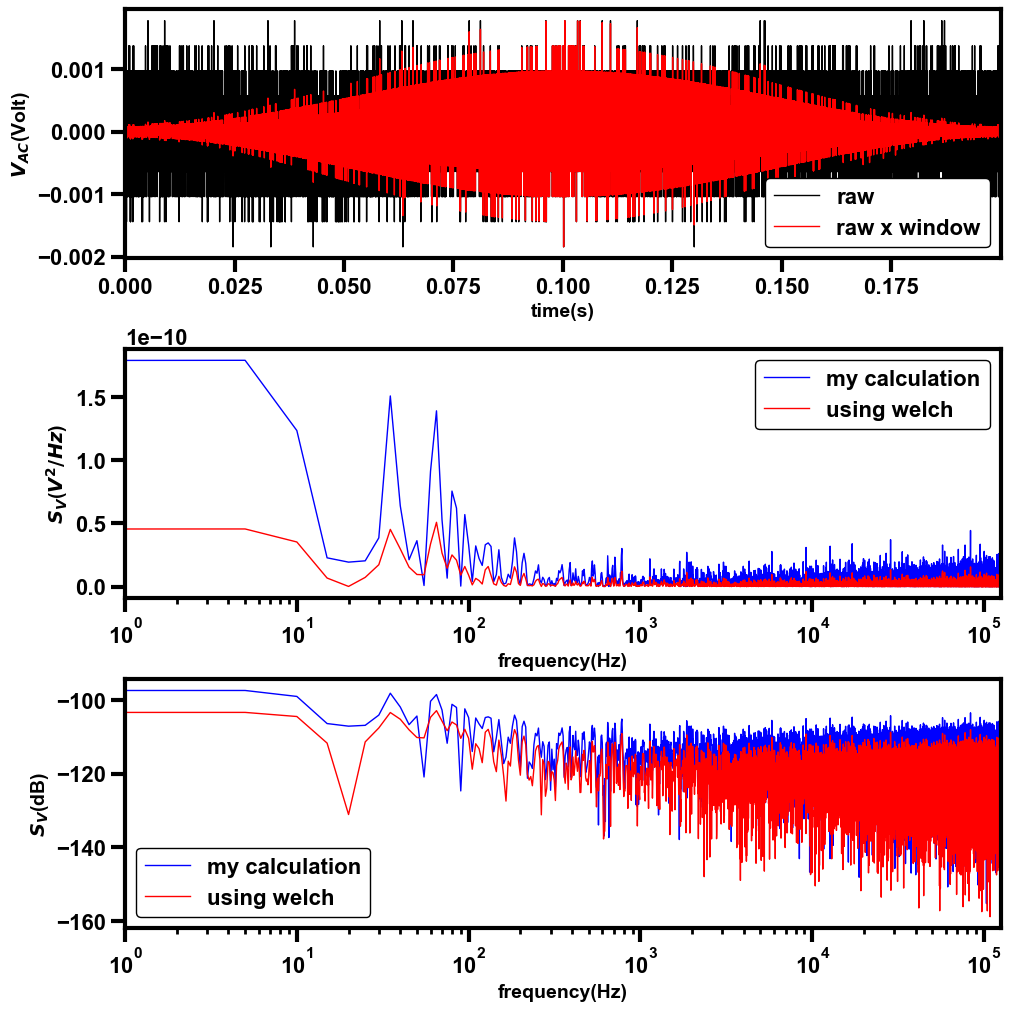

In [199]:
fp="./data/scope_2.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="my calculation")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="using welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="my calculation")
ax3.plot(fq,10*np.log10(SS),'r-', label="using welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

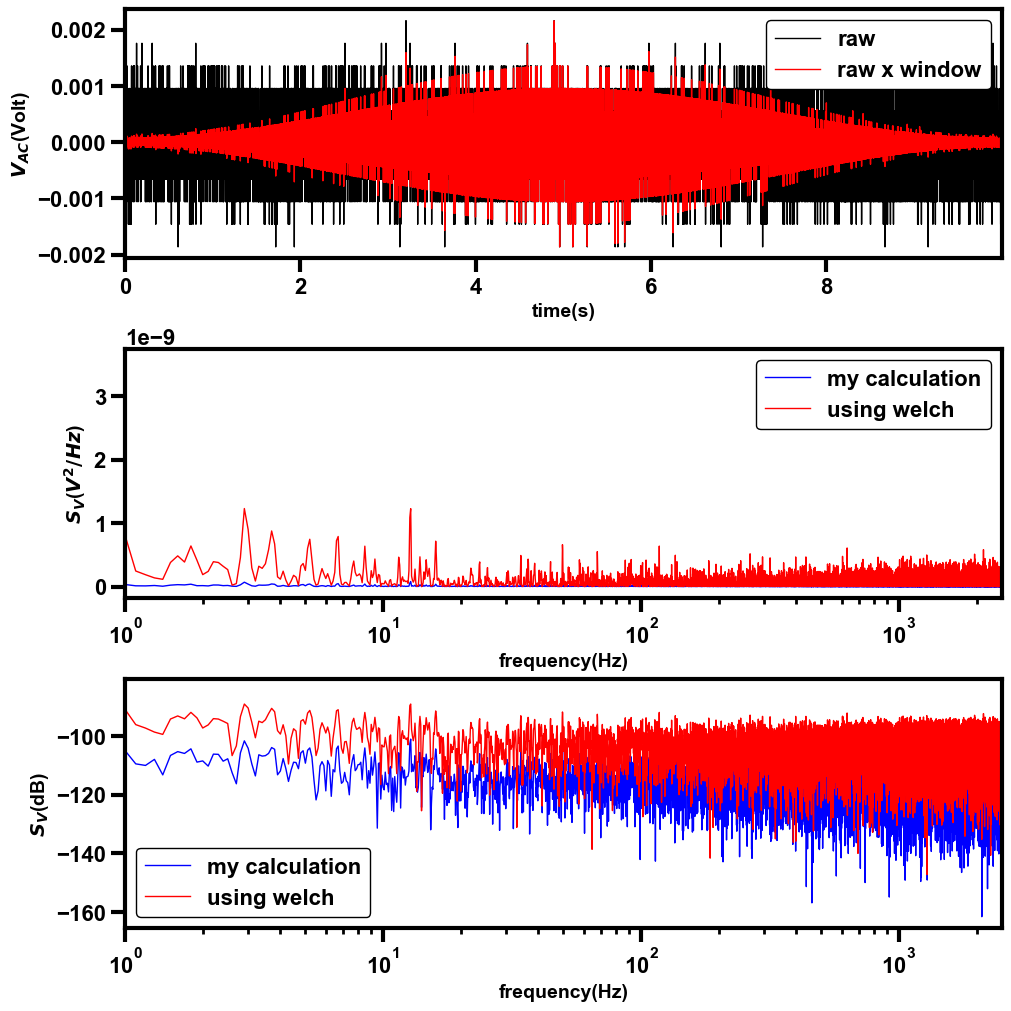

In [200]:
fp="./data/scope_4.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="my calculation")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="using welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="my calculation")
ax3.plot(fq,10*np.log10(SS),'r-', label="using welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

## 10 k Ohm background

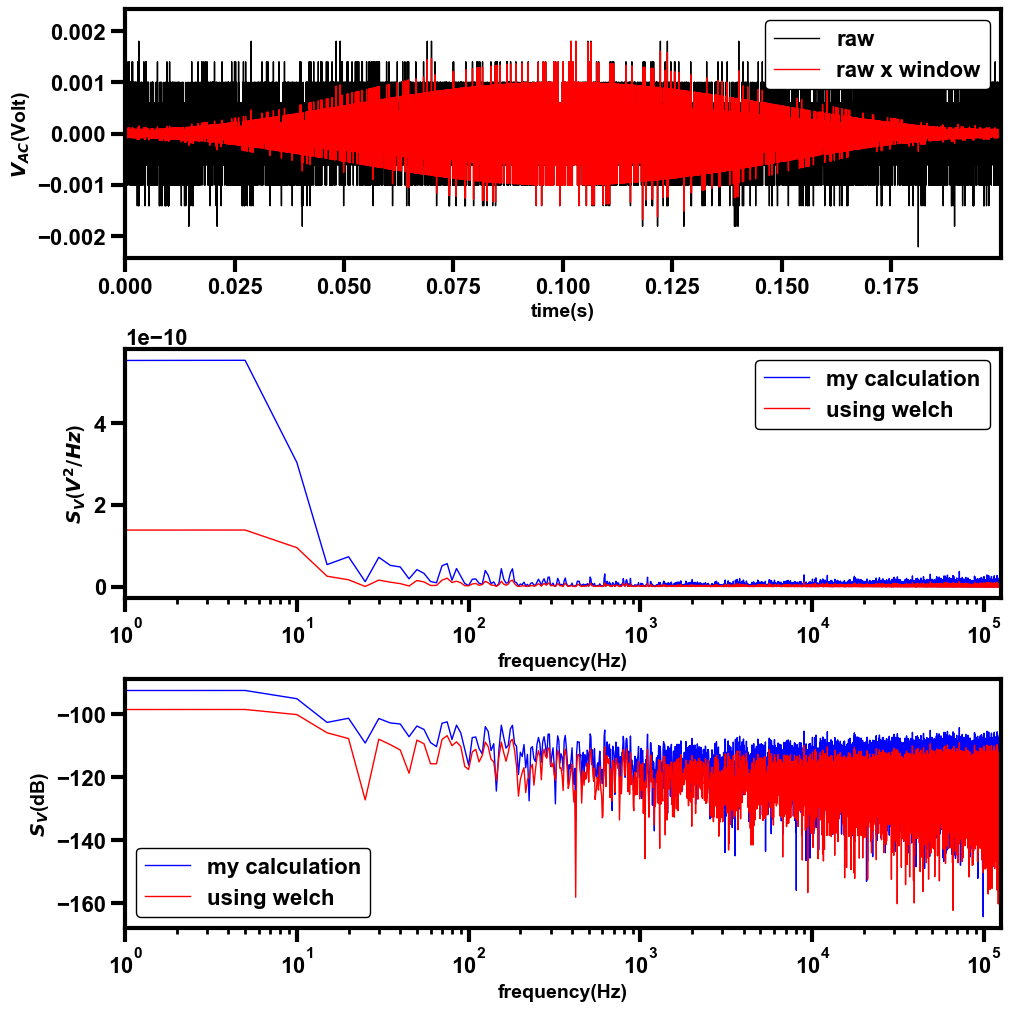

In [201]:
fp="./data/scope_3.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

sampling_time = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
sampling_rate = N/sampling_time # Hz
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy() # sine signal with frequency 500Hz

V = V - np.mean(V)

Vraw = V
V = V*hamming(N) # smoothing using a hamming window

auto_corr = correlate(V,V, mode="same") # mode="same" returns the same length as the input i.e. lags start from 0 to (N-1)*dt
S = fft(auto_corr)
S = S[:S.size//2]
S = 2*S/N**2
freq = fftfreq(len(auto_corr), d=1/sampling_rate)
freq = freq[:freq.size//2]

fq, SS = welch(V, fs=sampling_rate, window='hamming', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,10), constrained_layout=True)
ax1.plot(time, Vraw, label="raw")
ax1.plot(time, V, label="raw x window")
ax1.set_xlim(time.min(),time.max())
ax1.set_xlabel('time(s)')
ax1.set_ylabel('$V_{AC}$(Volt)')

ax2.plot(freq, np.absolute(S), 'b-', markersize=3, label="my calculation")
ax2.plot(fq, np.absolute(SS), 'r-', markersize=3, label="using welch")
ax2.set_xlabel('frequency(Hz)')
ax2.set_ylabel('$S_V$($V^2/Hz$)')
ax2.set_xlim(1, freq.max())
ax2.set_xscale('log')
# ax2.set_yscale('log')


ax3.plot(freq, 10*np.log10(np.absolute(S)), 'b-', markersize=3, label="my calculation")
ax3.plot(fq,10*np.log10(SS),'r-', label="using welch")
ax3.set_xlabel('frequency(Hz)')
ax3.set_ylabel('$S_V$(dB)')
ax3.set_xlim(1, freq.max())
ax3.set_xscale('log')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()


Sampling frequency is 10000.0 Hz
Et = 5826.651794236503 & Ek = 5826.9003867004585


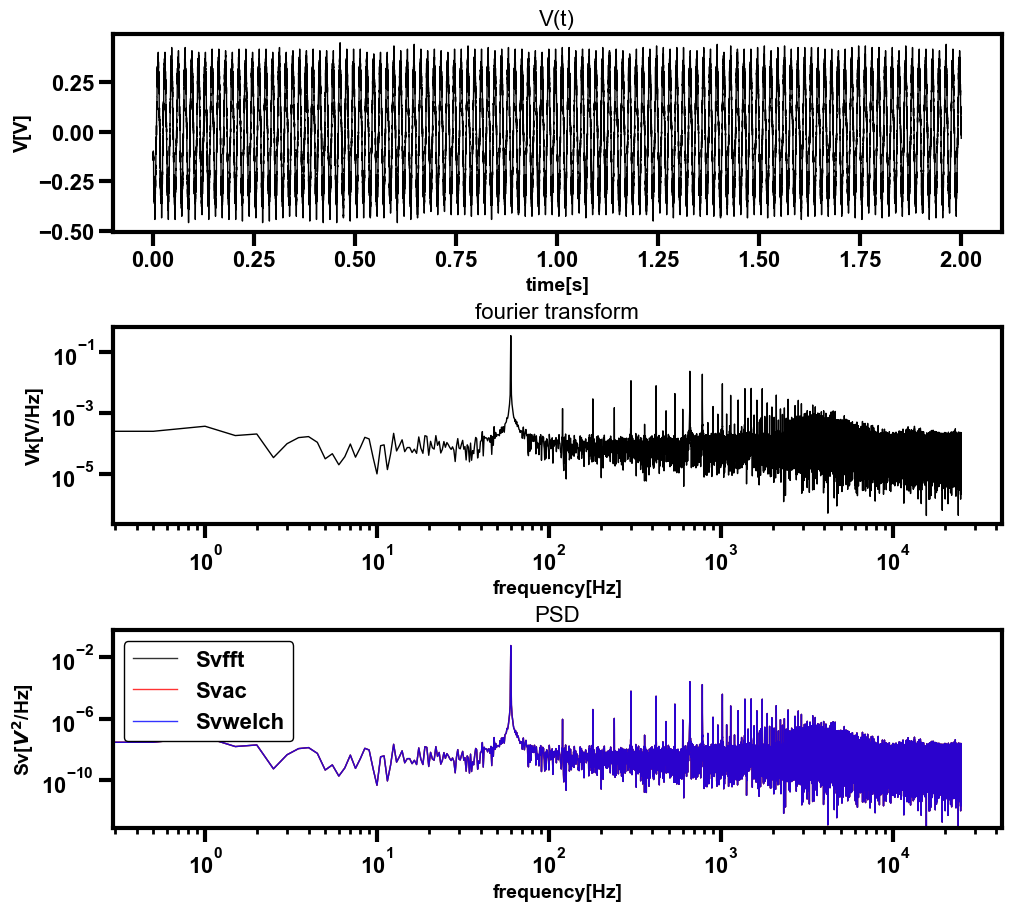

Svfft:
max=0.057272307229192375	min=8.997402458548169e-14
Svwelch:
max=0.057272307229192417	min=8.997402458553283e-14
Svac:
max=0.057272307229192396	min=8.997400952158034e-14
##################################################
sum of Svfft = 0.058269003867004586
sum of Svwelch = 0.05826403099367776
sum of Svac = 0.05826900386700461


In [205]:
#######################Simulated signal#######################################
dt = 0.0001 # time step in s
T = 2 # total time in s
fs = int(1/dt) # sampling frequency in Hz
N = int(T/dt) #number of points
time = np.arange(0,T,dt) # time in seconds
print(f"Sampling frequency is {1/dt} Hz")

fnoise_1 = 50 # noise frequency in Hz
Anoise_1 = 1 # noise amplitude

fnoise_2 = 120 # noise frequency in Hz
Anoise_2 = 0.7 # noise amplitude

V = Anoise_1*np.sin(2*np.pi* fnoise_1* time) + Anoise_2*np.sin(2*np.pi* fnoise_2* time)
######################################################################################
############### Signal from oscilloscope##############################################
######################################################################################

fp="./data/scope_7_1.csv"
df=pd.read_csv(fp,header=0,sep=",",skiprows=1, names=["time", "voltage"])
df.head()

T = df["time"].max()-df["time"].min() # seconds
N = df.shape[0]
fs = int(N/T) # Hz
dt = 1/fs
time = df["time"].to_numpy() - df["time"].min()

V = df["voltage"].to_numpy()
#########################################################################################


#Discrete Fourier transform of V
Vk = np.absolute(fftshift(fft(V)))
Vk = 2*Vk[Vk.size//2:] # folding and only selecting positive frequencies
Vk = Vk/N # normalizing
fk = fftfreq(N,dt)
fk = fk[:fk.size//2]

# Energy calculation
Et = np.sum(np.absolute(V)**2)
Ek = np.sum(np.absolute(Vk)**2)*(N/2)

print(f"Et = {Et} & Ek = {Ek}")

#PSD from FFT
Svfft = (1/2)*np.absolute(Vk)**2

#PSD from welch
fwelch, Svwelch = welch(V, fs=fs, window='boxcar', nperseg=N, noverlap=0, return_onesided=True, scaling='density', axis=-1)
Svwelch = (1/2)*Svwelch

# PSD from autocorrelation
def correlation_nik_vectorized(V1, V2):
    assert V1.size==V2.size
    n = V1.size
    lags = list(range(0,n,1))
    V2doubled = np.concatenate((V2,V2))
    cor = np.zeros(n)
    for lag in lags:
        cor[lag] = V1.dot(V2doubled[lag:lag+n])
    cor = cor/n
    return cor


ac = correlation_nik_vectorized(V,V)
Svac = np.absolute(fftshift(fft(ac)))
Svac = Svac[Svac.size//2:]
Svac = Svac/fs

#plot
fig, (ax1,ax2, ax3) = plt.subplots(3,1, figsize=(10,9), constrained_layout=True)

ax1.plot(time, V)
ax1.set_xlabel("time[s]")
ax1.set_ylabel("V[V]")
ax1.set_title("V(t)")

ax2.plot(fk, Vk)
ax2.set_xlabel("frequency[Hz]")
ax2.set_ylabel("Vk[V/Hz]")
ax2.set_title("fourier transform")
ax2.set_xscale('log')
ax2.set_yscale('log')


ax3.plot(fk, Svfft, alpha=0.8, label = "Svfft")
ax3.plot(fk, Svac, alpha=0.8, label = "Svac")
ax3.plot(fwelch, Svwelch, alpha=0.8, label = "Svwelch")
ax3.set_xlabel("frequency[Hz]")
ax3.set_ylabel("Sv[$V^2$/Hz]")
ax3.set_title("PSD")
ax3.set_ylim(Svwelch[10:].min()*0.9,Svwelch[10:].max()*10)
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend()

plt.show()

print(f"Svfft:\nmax={(Svfft.max())}\tmin={(Svfft[10:].min())}")
print(f"Svwelch:\nmax={(Svwelch.max())}\tmin={(Svwelch[10:].min())}")
print(f"Svac:\nmax={(Svac.max())}\tmin={(Svac[10:].min())}")
print(50*'#')
print(f"sum of Svfft = {np.sum(Svfft)}")
print(f"sum of Svwelch = {np.sum(Svwelch)}")
print(f"sum of Svac = {np.sum(Svac)}")